## Newsfeed project

In [6]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [19]:
# For text analysis
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('news.csv')
print(data.shape)

(50126, 9)


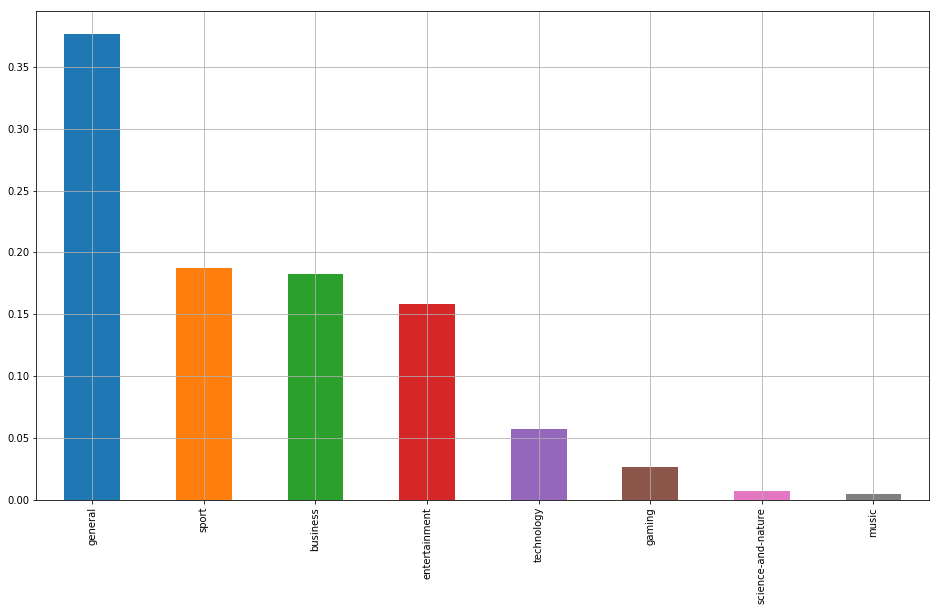

In [7]:
data.category.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(16, 9))

In [4]:
data = data.drop_duplicates('description')

In [8]:
data = data[~data['description'].isnull()]

print(data.shape)

(44773, 9)


In [9]:
data = data[(data.description.map(len) > 140) & (data.description.map(len) <= 300)]
data.reset_index(inplace=True, drop=True)

print(data.shape)

(13259, 9)


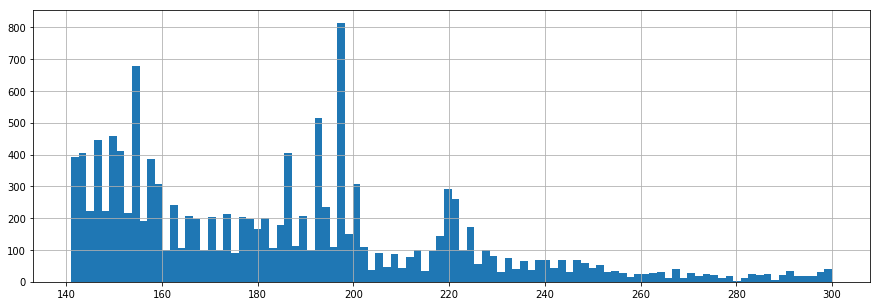

In [10]:
data.description.map(len).hist(figsize=(15, 5), bins=100)

In [11]:
data = data.sample(10000, random_state=42)
data.reset_index(inplace=True, drop=True)

data.head(2)

author  \
0                                       Craig Torres   
1  By Richard Spillett, Crime Correspondent For M...   

                                         description  \
0  Demographic trends are already slowing immigra...   
1  Six jails are offering child abusers drugs to ...   

                publishedAt      source  \
0  2017-03-23T04:01:00.004Z   bloomberg   
1      2017-03-01T12:12:12Z  daily-mail   

                                               title  \
0  No Need for a Wall: Latin Demographics to Shri...   
1  Jailed paedophiles could be 'chemically castra...   

                                                 url  \
0  https://www.bloomberg.com/politics/articles/20...   
1  http://www.dailymail.co.uk/news/article-427050...   

                                          urlToImage       category  \
0  https://assets.bwbx.io/s3/javelin/public/javel...       business   
1  http://i.dailymail.co.uk/i/pix/2017/03/01/08/0...  entertainment   

                scraping_date  
0  2017-03-23 06:05:26.107702  
1  2017-03-01 13:20:26.079158

## Text processing : tokenization

In [13]:
stop_words = []

f = open('stopwords.txt', 'r')
for l in f.readlines():
    stop_words.append(l.replace('\n', ''))
    
additional_stop_words = ['t', 'will']
stop_words += additional_stop_words

print(len(stop_words))

668


In [14]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [21]:
from functools import reduce
def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [22]:
data['description'] = data['description'].map(lambda d: unicode(d))
data['tokens'] = data['description'].progress_map(lambda d: tokenizer(d))



progress-bar:   0%|                                                                          | 0/10000 [00:00<?, ?it/s]

progress-bar:   1%|▊                                                             | 124/10000 [00:00<00:08, 1229.42it/s]

progress-bar:   3%|█▋                                                            | 270/10000 [00:00<00:07, 1279.30it/s]

progress-bar:   4%|██▌                                                           | 405/10000 [00:00<00:07, 1298.01it/s]

progress-bar:   6%|███▍                                                          | 562/10000 [00:00<00:07, 1337.83it/s]

progress-bar:   7%|████▎                                                         | 695/10000 [00:00<00:07, 1309.60it/s]

progress-bar:   9%|█████▎                                                        | 862/10000 [00:00<00:06, 1359.71it/s]

progress-bar:  10%|██████▏                                                       | 988/10000 [00:00<00:06, 1302.33it/s]

progress-bar:  12%|███████    

In [23]:
for descripition, tokens in zip(data['description'].head(5), data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print() 

description: Demographic trends are already slowing immigration to the U.S. from Latin America, making the current administration’s desire for a border wall look “anachronistic,” according to new research by University of California, San Diego, economists.
tokens: ['demographic', 'trends', 'slowing', 'immigration', 'latin', 'america', 'making', 'current', 'administration', 'desire', 'border', 'wall', 'anachronistic', 'university', 'california', 'san', 'diego', 'economists']

description: Six jails are offering child abusers drugs to reduce sexual interest and obsessive behaviour while they serve their sentences after it was trialled at HMP Whatton in Nottinghamshire.
tokens: ['jails', 'offering', 'child', 'abusers', 'drugs', 'reduce', 'sexual', 'interest', 'obsessive', 'behaviour', 'serve', 'sentences', 'trialled', 'hmp', 'whatton', 'nottinghamshire']

description: Washington Huskies wide receiver John Ross officially broke Chris Johnson's long-standing 40-yard-dash record Saturday   a

In [24]:
def keywords(category):
    tokens = data[data['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [25]:
for category in set(data['category']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('---')

category : science-and-nature
top 10 keywords: [('people', 14), ('help', 12), ('space', 9), ('children', 7), ('health', 7), ('better', 7), ('time', 6), ('water', 6), ('long', 6), ('technology', 6)]
---
category : sport
top 10 keywords: [('team', 140), ('year', 134), ('season', 130), ('nfl', 119), ('time', 93), ('league', 91), ('free', 89), ('win', 79), ('ian', 73), ('rapoport', 73)]
---
category : entertainment
top 10 keywords: [('year', 145), ('people', 127), ('time', 106), ('week', 98), ('pictured', 92), ('season', 88), ('night', 88), ('appeared', 85), ('series', 85), ('episode', 84)]
---
category : business
top 10 keywords: [('trump', 375), ('president', 278), ('donald', 214), ('house', 129), ('year', 104), ('people', 81), ('state', 69), ('administration', 68), ('white', 67), ('care', 66)]
---
category : technology
top 10 keywords: [('company', 72), ('today', 66), ('google', 52), ('year', 45), ('uber', 41), ('time', 39), ('apple', 37), ('launch', 35), ('announced', 35), ('mobile', 3

## Text processing : tf-idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))

vz.shape

(10000, 7204)

In [27]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [28]:
tfidf.head()

tfidf
aaron          7.645491
aaron rodgers  8.418681
abandon        8.013216
abandoned      8.264530
abandoning     8.418681

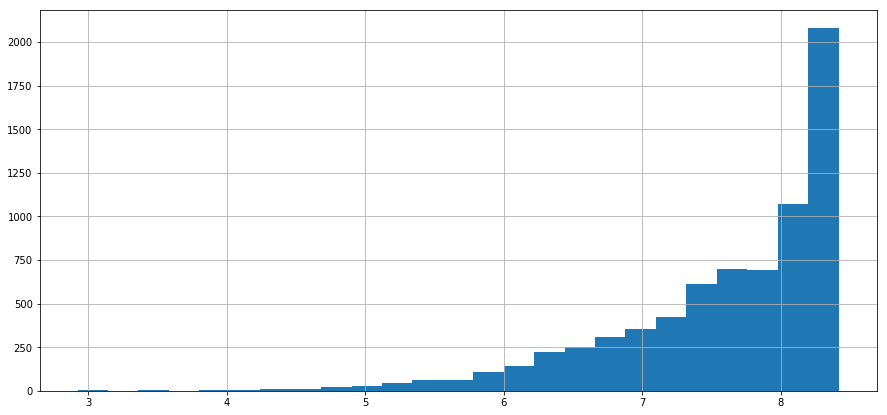

In [29]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))

In [30]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 30 tokens that have the lowest tfidf scores

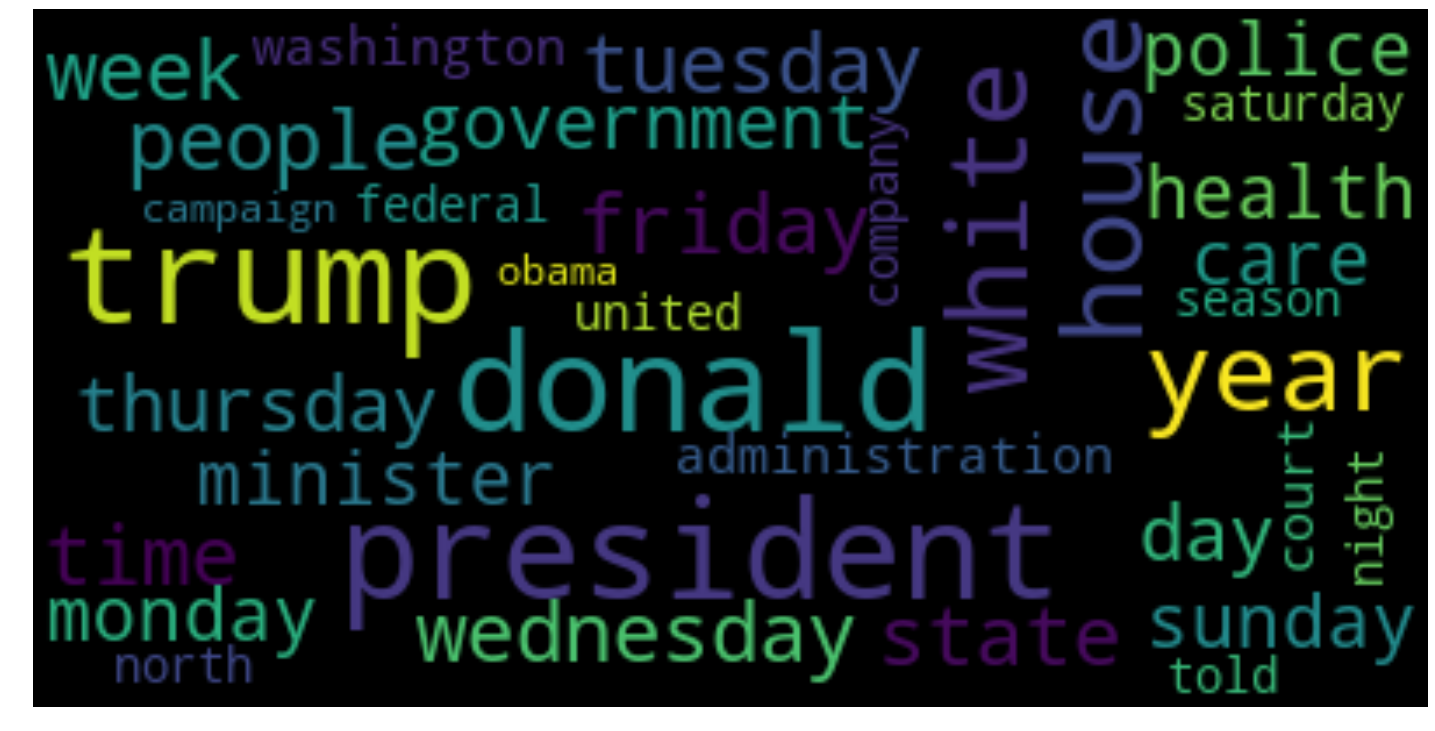

In [31]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))

In [ ]:
### 30 top words with highest tfidf

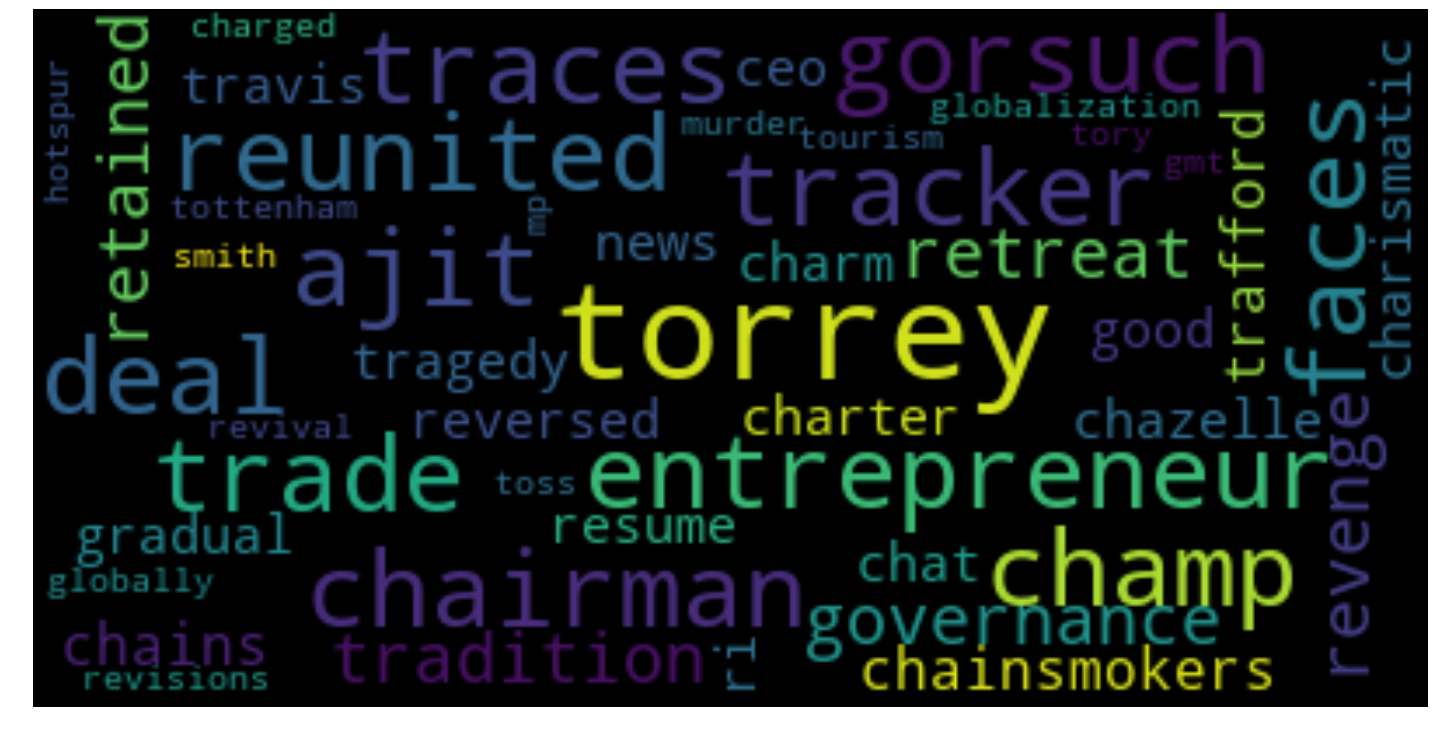

In [32]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(40))

## Dimension reduction

In [33]:
# apply svd i.e Singular Value Decomposition  upto 50 columns
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

svd_tfidf.shape

(10000, 50)

In [ ]:
# apply t-SNE for dimensionality reduction to 2 or 3


In [34]:
run = False
if run:
# run this (takes times)
    from sklearn.manifold import TSNE
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
    tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
    print(tsne_tfidf.shape)
    tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
    tsne_tfidf_df.columns = ['x', 'y']
    tsne_tfidf_df['category'] = data['category']
    tsne_tfidf_df['description'] = data['description']
    tsne_tfidf_df.to_csv('tsne_tfidf.csv', encoding='utf-8', index=False)
else:
# or import the dataset directly
    tsne_tfidf_df = pd.read_csv('tsne_tfidf.csv')

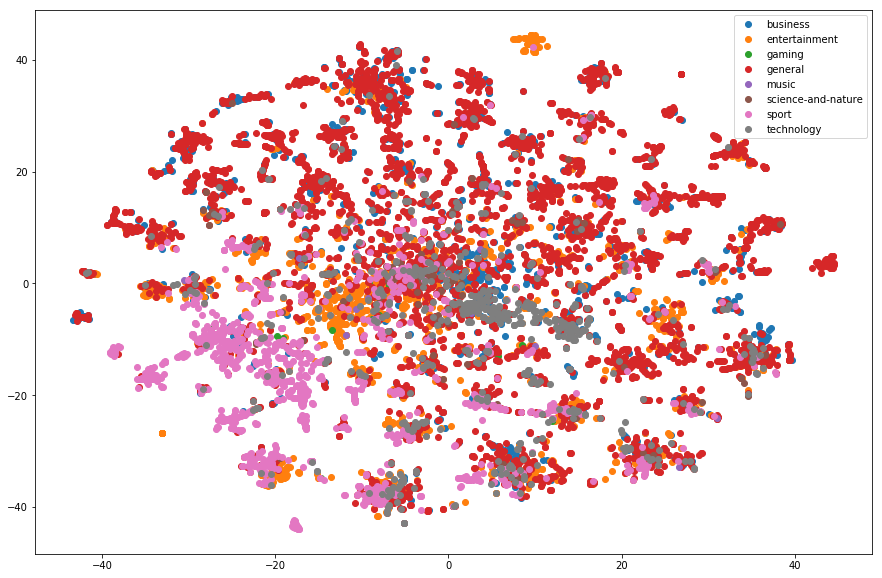

In [35]:
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()

In [36]:
# importing bokeh packages and initializing the plot figure
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

In [37]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category10'][len(tsne_tfidf_df['category'].unique())]
color_map = bmo.CategoricalColorMapper(factors=tsne_tfidf_df['category'].map(str).unique(), palette=palette)

plot_tfidf.scatter(x='x', y='y', color={'field': 'category', 'transform': color_map}, 
                   legend='category', source=tsne_tfidf_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category":"@category"}

show(plot_tfidf)

Loading BokehJS ...

## 4) Clustering

### 4 - 1 - KMeans

In [38]:
vz.shape

(10000, 7204)

In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [40]:
distorsions = []
sil_scores = []
k_max = 80
for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, random_state=42,  
                         init_size=1000, verbose=False, max_iter=1000)
    kmeans_model.fit(vz)
    sil_score = silhouette_score(vz, kmeans_model.labels_)
    sil_scores.append(sil_score)
    distorsions.append(kmeans_model.inertia_)

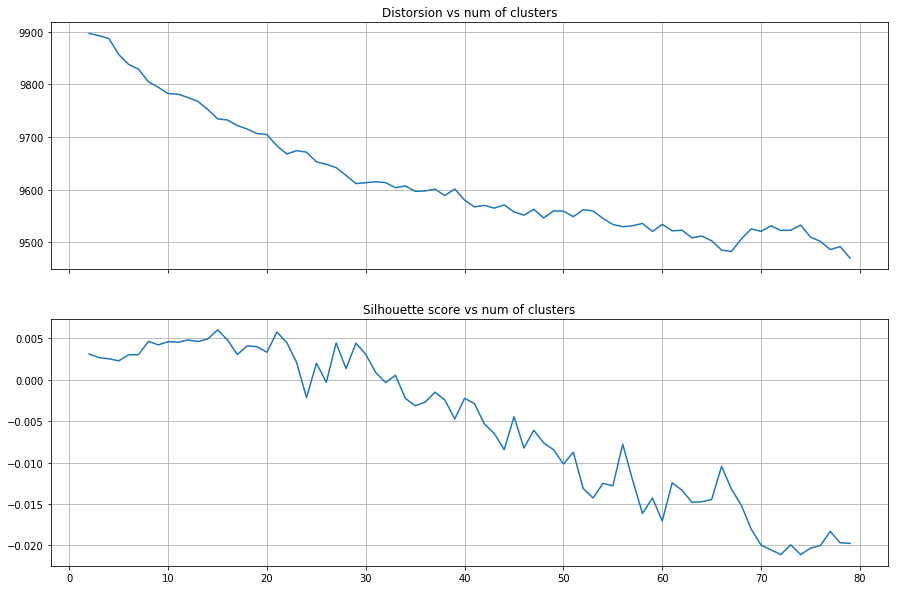

In [41]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax1.plot(range(2, k_max), distorsions)
ax1.set_title('Distorsion vs num of clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)

In [42]:
num_clusters = 40
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42,                       
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000, )
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [43]:
for (i, desc),category in zip(enumerate(data.description),data['category']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('category: ',category)
        print('---')

Cluster 13: Demographic trends are already slowing immigration to the U.S. from Latin America, making the current administration’s desire for a border wall look “anachronistic,” according to new research by University of California, San Diego, economists.(distance: 0.9976811471186411)
category:  business
---
Cluster 13: Six jails are offering child abusers drugs to reduce sexual interest and obsessive behaviour while they serve their sentences after it was trialled at HMP Whatton in Nottinghamshire.(distance: 0.9996754502013011)
category:  entertainment
---
Cluster 13: Washington Huskies wide receiver John Ross officially broke Chris Johnson's long-standing 40-yard-dash record Saturday   at the NFL Scouting Combine in Indianapolis with a speedy sprint that took all of 4...(distance: 0.9972146524668323)
category:  general
---
Cluster 13: Is the new, Lego-ized version of The Belko Experiment trailer less disturbing than it’s flesh-and-blood red band counterpart? Yes. But, given the actua

In [44]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(num_clusters):
    topic_keywords = []
    for j in sorted_centroids[i, :10]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['topic_{0}'.format(i) for i in range(num_clusters)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df

keyword_0           keyword_1            keyword_2  \
topic_0                league                roma               napoli   
topic_1             obamacare              repeal                house   
topic_2                season              series                 time   
topic_3                better              khabib  khabib nurmagomedov   
topic_4                 state            minister       prime minister   
topic_5                 north               korea          north korea   
topic_6                 trump           president         donald trump   
topic_7                budget                cuts                trump   
topic_8               hailing        ride hailing                 ride   
topic_9               company                snap                  ipo   
topic_10              hammond      philip hammond               philip   
topic_11               police             angeles          los angeles   
topic_12                 best                 man                years   
topic_13               people                time                 week   
topic_14              players   manchester united           manchester   
topic_15                yahoo          department              justice   
topic_16             rapoport        ian rapoport                  ian   
topic_17                 york           york city                 city   
topic_18               bellew         tony bellew                 tony   
topic_19                mosul       islamic state              islamic   
topic_20        united states              states               united   
topic_21                  ban              travel                order   
topic_22       stories talked     upcoming events       events stories   
topic_23                 rock               berry                chuck   
topic_24          white house               house                white   
topic_25     attorney general            attorney              general   
topic_26                 quot              brexit                union   
topic_27             congress             address                trump   
topic_28                court       supreme court              supreme   
topic_29              winning               award                match   
topic_30      episode walking             victory        spoiler alert   
topic_31                trade          free trade             commerce   
topic_32                 year           australia                india   
topic_33               torino            joe hart                 hart   
topic_34               health         health care                 care   
topic_35               browns           cleveland     cleveland browns   
topic_36             children             schools                  bbc   
topic_37  originally appeared  article originally           originally   
topic_38                geert       geert wilders              wilders   
topic_39                  fbi               comey          james comey   

                   keyword_3          keyword_4        keyword_5  \
topic_0             juventus   champions league   premier league   
topic_1              replace               care       republican   
topic_2               second             finale    second season   
topic_3         nurmagomedov                ufc         ferguson   
topic_4                prime    secretary state        tillerson   
topic_5                 jong                kim         kim jong   
topic_6               donald   president donald            obama   
topic_7        environmental           spending           agency   
topic_8                 uber  uber technologies     technologies   
topic_9               shares               uber         offering   
topic_10              budget         chancellor        manifesto   
topic_11                 los            officer   police officer   
topic_12                  la              media             film   
topic_13                 day     

In [46]:
run = False
if run:
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
    tsne_kmeans = tsne_model.fit_transform(svd_kmeans)
    kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
    kmeans_df['cluster'] = kmeans_clusters
    kmeans_df['cluster'] = kmeans_df['cluster'].map(str)
    kmeans_df['description'] = data['description']
    kmeans_df['category'] = data['category']
    kmeans_df.to_csv('tsne_kmeans.csv', index=False, encoding='utf-8')
else:
    kmeans_df = pd.read_csv('tsne_kmeans.csv')
    kmeans_df['cluster'] = kmeans_df['cluster'].map(str)

In [47]:
reset_output()
output_notebook()
plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=kmeans_df['cluster'].unique(), palette=palette)

plot_kmeans.scatter('x', 'y', source=kmeans_df, 
                    color={'field': 'cluster', 'transform': color_map}, 
                    legend='cluster')
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "cluster": "@cluster", "category": "@category"}

show(plot_kmeans)

Loading BokehJS ...

## 4 - 2  Latent Dirichlet Allocation

In [48]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
import gensim.corpora as corpora
from gensim import matutils
from gensim.models import CoherenceModel

In [49]:
aux = data.copy()

bigram = gensim.models.Phrases(aux['tokens'], min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
aux['tokens_bigram'] = aux['tokens'].progress_map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(aux['tokens_bigram'])
texts = aux['tokens_bigram'].values
corpus = [id2word.doc2bow(text) for text in texts]



progress-bar:   0%|                                                                          | 0/10000 [00:00<?, ?it/s]

progress-bar:  20%|███████████▉                                                | 1983/10000 [00:00<00:00, 19746.55it/s]

progress-bar:  44%|██████████████████████████▎                                 | 4394/10000 [00:00<00:00, 20118.78it/s]

progress-bar:  65%|██████████████████████████████████████▉                     | 6486/10000 [00:00<00:00, 19657.51it/s]

progress-bar:  85%|██████████████████████████████████████████████████▉         | 8488/10000 [00:00<00:00, 19221.81it/s]

progress-bar: 100%|███████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 20014.76it/s]

In [50]:
def LDA_model(num_topics, passes=1):
    return gensim.models.ldamodel.LdaModel(corpus=tqdm_notebook(corpus, leave=False),
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               eval_every=10,
                                               chunksize=2000,
                                               passes=passes,
                                               per_word_topics=True
                                            )

In [51]:
def compute_coherence(model):
    coherence = CoherenceModel(model=model, 
                           texts=aux['tokens_bigram'].values,
                           dictionary=id2word, coherence='c_v')
    return coherence.get_coherence()

In [ ]:
"""
f = open(os.path.expanduser("~/Downloads/test.csv"))
data = pd.DataFrame(f)

import pandas as pd

data = pd.read_csv(os.path.expanduser("~/Downloads/test.csv"))

data = pd.DataFrame(os.path.expanduser("~/Downloads/test.csv"))

"""

In [63]:
def display_topics(model):
    topics = model.show_topics(num_topics=model.num_topics, formatted=False, num_words=10)
    topics = map(lambda c: map(lambda cc: cc[0], c[1]), topics)
    df = pd.DataFrame(topics, copy=False)
    df.index = ['topic_{0}'.format(i) for i in range(model.num_topics)]
    df.columns = ['keyword_{0}'.format(i) for i in range(1, 10+1)]
    return df

In [59]:
def explore_models(df, rg=range(5, 25)):
    id2word = corpora.Dictionary(df['tokens_bigram'])
    texts = df['tokens_bigram'].values
    corpus = [id2word.doc2bow(text) for text in texts]

    models = []
    coherences = []
    
    for num_topics in tqdm_notebook(rg, leave=False):
        lda_model = LDA_model(num_topics, passes=5)
        models.append(lda_model)
        coherence = compute_coherence(lda_model)
        coherences.append(coherence)
      

    fig = plt.figure(figsize=(15, 5))
    plt.title('Choosing the optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.plot(rg, coherences)
    
    return coherences, models

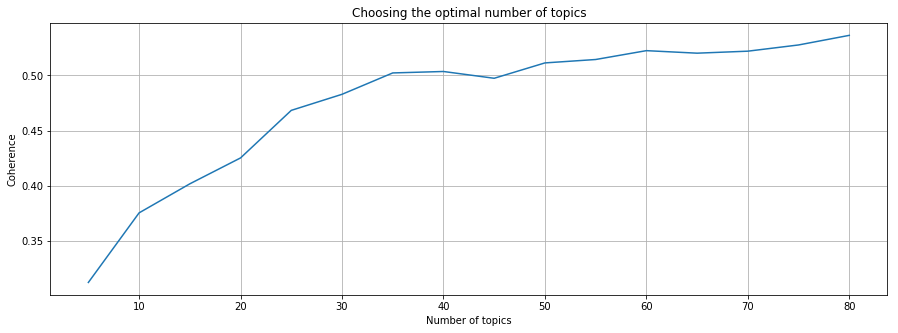

In [60]:
coherences, models = explore_models(aux, rg=range(5, 85, 5))

In [61]:
best_model = LDA_model(num_topics=40, passes=5)

In [79]:
best_model.print_topics()

[(20,
  '0.040*"bill" + 0.038*"house" + 0.026*"health_care" + 0.020*"republicans" + 0.020*"plan" + 0.020*"republican" + 0.019*"gop" + 0.016*"obamacare" + 0.016*"vote" + 0.013*"changes"'),
 (37,
  '0.019*"better" + 0.009*"schools" + 0.009*"judge" + 0.008*"unit" + 0.008*"public" + 0.008*"years" + 0.007*"starting" + 0.007*"decade" + 0.007*"removed" + 0.007*"season"'),
 (32,
  '0.013*"service" + 0.012*"great" + 0.011*"britain" + 0.010*"high" + 0.010*"workers" + 0.007*"cities" + 0.007*"netherlands" + 0.007*"force" + 0.006*"american" + 0.006*"check"'),
 (4,
  '0.012*"people" + 0.011*"security" + 0.009*"officials" + 0.009*"airport" + 0.009*"south" + 0.008*"east" + 0.008*"china" + 0.007*"age" + 0.007*"years" + 0.007*"andrew"'),
 (17,
  '0.029*"prime_minister" + 0.023*"talks" + 0.017*"india" + 0.016*"test" + 0.016*"theresa" + 0.013*"find" + 0.011*"start" + 0.011*"australia" + 0.011*"party" + 0.009*"match"'),
 (21,
  '0.013*"weekend" + 0.013*"program" + 0.012*"time" + 0.011*"takes" + 0.009*"poin

In [64]:
display_topics(model=best_model)

TypeError: data argument can't be an iterator

In [65]:
def get_document_topic_matrix(corpus, num_topics=best_model.num_topics):
    matrix = []
    for row in tqdm_notebook(corpus):
        output = np.zeros(num_topics)
        doc_proba = best_model[row][0]
        for doc, proba in doc_proba:
            output[doc] = proba
        matrix.append(output)
    matrix = np.array(matrix)
    return matrix

In [66]:
matrix = get_document_topic_matrix(corpus)

In [67]:
doc_topic = best_model.get_document_topics(corpus)
lda_keys = []
for i, desc in enumerate(data['description']):
    lda_keys.append(np.argmax(matrix[i, :]))

In [69]:
run = False
if run: 
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
    tsne_lda = tsne_model.fit_transform(matrix)
    lda_df = pd.DataFrame(tsne_lda, columns=['x', 'y'])
    lda_df['topic'] = lda_keys
    lda_df['topic'] = lda_df['topic'].map(str)
    lda_df['description'] = data['description']
    lda_df['category'] = data['category']
    lda_df.to_csv('tsne_lda.csv', index=False, encoding='utf-8')
else:
    lda_df = pd.read_csv('tsne_lda.csv')
    lda_df['topic'] = lda_df['topic'].map(str)

In [70]:
reset_output()
output_notebook()
plot_lda = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=lda_df['topic'].unique(), palette=palette)

plot_lda.scatter('x', 'y', source=lda_df, 
                    color={'field': 'topic', 'transform': color_map}, 
                    legend='topic')
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "topic": "@topic", "category": "@category"}

show(plot_lda)

Loading BokehJS ...

# More visualization

In [71]:
import pyLDAvis
import pyLDAvis.gensim

In [80]:
lda_vis = pyLDAvis.gensim.prepare(best_model,corpus, id2word)
pyLDAvis.display(lda_vis)

In [72]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(best_model, corpus, id2word)

In [74]:
pyLDAvis.save_html(panel, 'pyLDAvis.html')

## NMF: Non-negative Matrix Factorization

In [75]:
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))

In [76]:
nmf = NMF(n_components=40, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(vz)

In [77]:
feature_names = vectorizer.get_feature_names()
no_top_words = 10

for topic_idx, topic in enumerate(nmf.components_[:10]):
    print("Topic %d:"% (topic_idx))
    print(" | ".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))

Topic 0:
donald | donald trump | trump | president donald | president | washington | congress | tuesday | campaign | speech
Topic 1:
zuckerberg | fee | fiery | fight | fight islamic | fighter | fighters | fighting | fighting islamic | fights
Topic 2:
health | care | health care | gop | republicans | republican | insurance | republican health | plan | law
Topic 3:
south | korea | south korea | park | missile | geun hye | geun | hye | park geun | president park
Topic 4:
white | white house | house | press | spicer | house press | sean spicer | sean | press secretary | secretary sean
Topic 5:
minister | prime | prime minister | theresa | union | european | minister theresa | brexit | european union | independence
Topic 6:
rapoport | ian rapoport | ian | nfl | nfl network | network | insider ian | network insider | insider | reported
Topic 7:
attorney | general | attorney general | sessions | jeff sessions | jeff | general jeff | russian | ambassador | russian ambassador
Topic 8:
north | k